# **Naive Bayes Classifier**

Naïve Bayes algorithm is a supervised learning algorithm, based on **Bayes theorem** to solve classification problems. <br>
The general equation of Bayes theorem is:<br>
`P(A|B) = P(B|A)P(A) / P(B)` <br>
where, <br>
- P(A) and P(B) are the probabilities of events A and B
- P(A|B) is the probability of event A when event B happens
- P(B|A) is the probability of event B when A happens

In [1]:
import numpy as np

class SimpleNaiveBayes:
    def __init__(self):
        self.classes = None
        self.means = None
        self.variances = None
        self.priors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.means = np.zeros((n_classes, n_features), dtype=np.float64)
        self.variances = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx, :] = X_c.mean(axis=0)
            self.variances[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.variances[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

Accuracy: 1.0


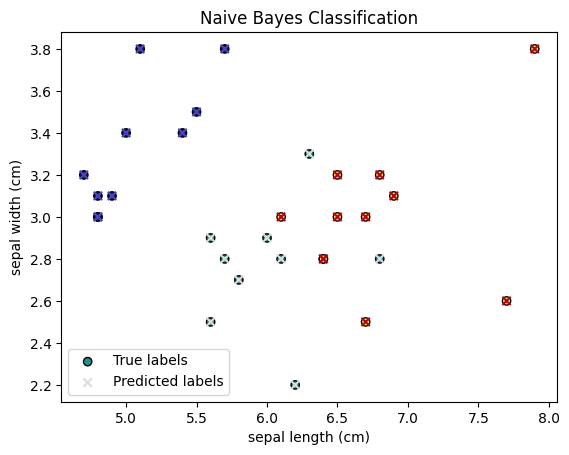

In [2]:
#Testing case
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.datasets import load_iris
    import matplotlib.pyplot as plt

    iris = load_iris()
    X, y = iris.data, iris.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    nb = SimpleNaiveBayes()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='k', label='True labels')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted labels')
    plt.title("Naive Bayes Classification")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()
    plt.show()

## Gausian Naive Bayes

Gaussian Naive Bayes is a type of Naive Bayes method where continuous attributes are considered on a normally distributed data. Gaussian Naive Bayes assumes that the likelihood follows the Gaussian Distribution. <br>
Therefore,<br>
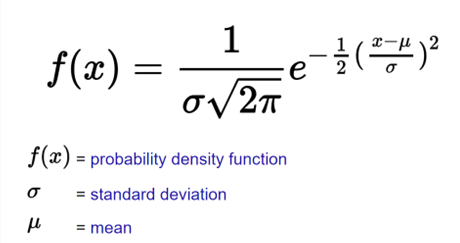

In [3]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.means = None
        self.variances = None
        self.priors = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.means = np.zeros((n_classes, n_features), dtype=np.float64)
        self.variances = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[idx, :] = X_c.mean(axis=0)
            self.variances[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.variances[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

Testing Gaussian Naive Bayes
Accuracy: 1.0


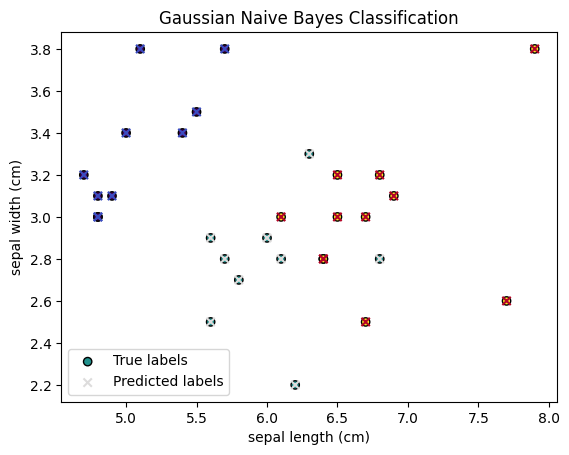

In [4]:
# Testing algorithm
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.datasets import load_iris, fetch_20newsgroups_vectorized
    import matplotlib.pyplot as plt

    # Test Gaussian Naive Bayes
    print("Testing Gaussian Naive Bayes")
    iris = load_iris()
    X, y = iris.data, iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gnb = GaussianNaiveBayes()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='k', label='True labels')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Predicted labels')
    plt.title("Gaussian Naive Bayes Classification")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()
    plt.show()

## Bernoulli Naive Bayes

For the computation of discrete probability, Bernoulli Naive Bayes is utilized. Either success or failure is calculated. In this case, the random variable has two possible values: 0 and 1, whose probability of happening is represented by p and 1-p, respectively.<br>
The equation of Bernoulli Naive Bayes is as follows:<br>
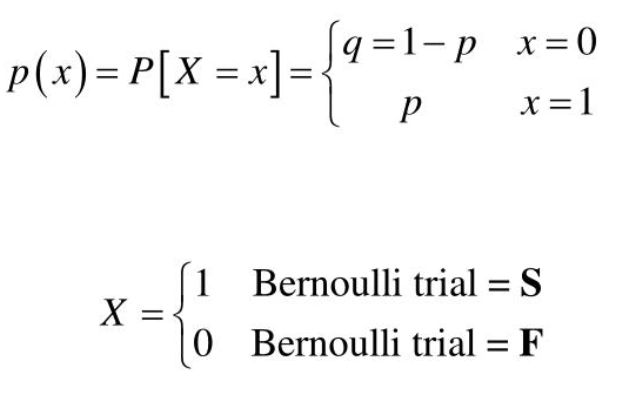

In [5]:
import numpy as np
class BernoulliNaiveBayes:
    def __init__(self, alpha=1.0, binarize=0.0):
        self.alpha = alpha  # Laplace smoothing parameter
        self.binarize = binarize  # Threshold for binarizing (feature values)
        self.class_log_prior_ = None
        self.feature_log_prob_ = None
        self.feature_log_prob_not_ = None
        self.classes_ = None

    def fit(self, X, y):
        if self.binarize is not None:
            X = np.where(X.toarray() > self.binarize, 1, 0)

        count_sample = X.shape[0]
        self.classes_ = np.unique(y)
        count_classes = len(self.classes_)

        self.class_log_prior_ = np.zeros(count_classes, dtype=np.float64)
        self.feature_log_prob_ = np.zeros((count_classes, X.shape[1]), dtype=np.float64)
        self.feature_log_prob_not_ = np.zeros((count_classes, X.shape[1]), dtype=np.float64)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.class_log_prior_[idx] = np.log(X_c.shape[0] / float(count_sample))
            smoothed_count = X_c.sum(axis=0) + self.alpha
            smoothed_count_not = X_c.shape[0] - X_c.sum(axis=0) + self.alpha
            smoothed_total = smoothed_count.sum()
            smoothed_total_not = smoothed_count_not.sum()

            self.feature_log_prob_[idx, :] = np.log(smoothed_count / smoothed_total)
            self.feature_log_prob_not_[idx, :] = np.log(smoothed_count_not / smoothed_total_not)

    def predict(self, X):
        if self.binarize is not None:
          X_dense = X.toarray()
          X_dense = np.where(X_dense > self.binarize, 1, 0)

        jll = self._joint_log_likelihood(X_dense)
        return self.classes_[np.argmax(jll, axis=1)]

    def _joint_log_likelihood(self, X):
        jll = []
        for i in range(len(self.classes_)):
            log_prob_x_given_c = X * self.feature_log_prob_[i] + (1 - X) * self.feature_log_prob_not_[i]
            log_prob_c = self.class_log_prior_[i]
            jll.append(log_prob_c + log_prob_x_given_c.sum(axis=1))
        return np.array(jll).T

In [6]:
# Testing algorithm
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.datasets import load_iris, fetch_20newsgroups_vectorized
    import matplotlib.pyplot as plt

    # Test Bernoulli Naive Bayes
    print("Testing Bernoulli Naive Bayes")
    newsgroups = fetch_20newsgroups_vectorized(subset='train') # Load the newsgroups dataset

    X_binarized = newsgroups.data.sign()  # Efficiently binarize the sparse matrix
    X_train, X_test, y_train, y_test = train_test_split(X_binarized, newsgroups.target, test_size=0.2, random_state=42)

    bnb = BernoulliNaiveBayes(alpha=1.0, binarize=0.0)
    bnb.fit(X_train, y_train)
    y_pred = bnb.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Testing Bernoulli Naive Bayes
Accuracy: 0.8497569597878922


## Multinomial Naive Bayes

The term “multinomial” refers to the type of data distribution assumed by the model. In a variety of natural language processing (NLP) applications, Multinomial Naive Bayes is a probabilistic classifier that can determine the probability distribution of text input. As such, it is well-suited for data containing features that indicate discrete frequencies or counts of events.<br>
Therefore,<br>
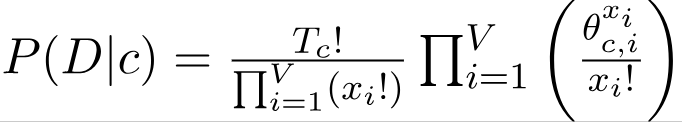
<br>
where,<br>
- T_c is the total number of words in documents of class c.
- x_i is the count of word i in document D.
- theta_(c,i) is the probability of word i occurring in a document of class c

In [7]:
import numpy as np
from scipy.sparse import issparse

class MultinomialNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Laplace smoothing parameter
        self.class_log_prior_ = None
        self.feature_log_prob_ = None
        self.classes_ = None

    def fit(self, X, y):
        count_sample = X.shape[0]
        self.classes_ = np.unique(y)
        count_classes = len(self.classes_)

        self.class_log_prior_ = np.zeros(count_classes, dtype=np.float64)
        self.feature_log_prob_ = np.zeros((count_classes, X.shape[1]), dtype=np.float64)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            if issparse(X_c):
                X_c = X_c.toarray()
            self.class_log_prior_[idx] = np.log(X_c.shape[0] / float(count_sample))
            smoothed_count = X_c.sum(axis=0) + self.alpha
            smoothed_total = smoothed_count.sum()
            self.feature_log_prob_[idx, :] = np.log(smoothed_count / smoothed_total)

    def predict(self, X):
        jll = self._joint_log_likelihood(X)
        return self.classes_[np.argmax(jll, axis=1)]

    def _joint_log_likelihood(self, X):
        if issparse(X):
            return X @ self.feature_log_prob_.T + self.class_log_prior_
        else:
            return np.dot(X, self.feature_log_prob_.T) + self.class_log_prior_

In [8]:
# Testing algorithm
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.datasets import load_iris, fetch_20newsgroups_vectorized
    import matplotlib.pyplot as plt

    # Test Multinomial Naive Bayes
    print("Testing Multinomial Naive Bayes")
    newsgroups = fetch_20newsgroups_vectorized(subset='train')
    X, y = newsgroups.data, newsgroups.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    mnb = MultinomialNaiveBayes(alpha=1.0)
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Testing Multinomial Naive Bayes
Accuracy: 0.7445868316394167
